In [98]:
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.path.join(os.getcwd(), ".."), ".."))
sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
from data_generation.models.tech_substitution import TechnologySubstitution, NumericalSolver
from data_generation.simulations.grid import Grid, fractional_transformation
from data_generation.simulations.simulator import Simulator
from data_generation.simulations.coverage_analyzer import CoverageAnalyzer

In [99]:
g = Grid([(0, np.inf), (0, np.inf)], [5, 5],[fractional_transformation(3), fractional_transformation(3)])

In [100]:
X, _ = g.get_initial_conditions(num_points_per_cell=2)
Z = g.transform(X)

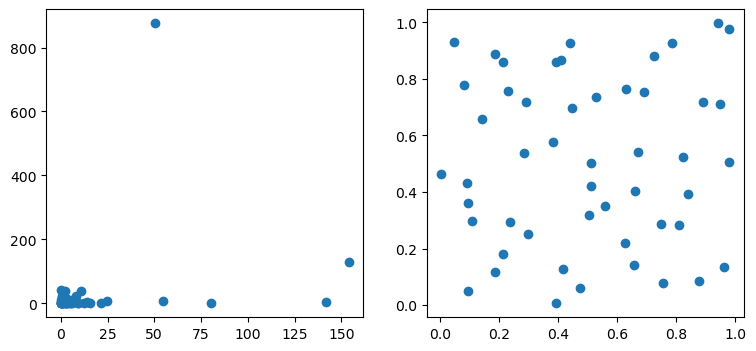

In [101]:
figure, axis = plt.subplots(1, 2, figsize=(9,4))
axis[0].scatter(X[:,0], X[:,1])
axis[1].scatter(Z[:,0], Z[:,1])
plt.show()

In [102]:
z_analyzer = CoverageAnalyzer(n_bins=10)

({'occupied_bins': np.int64(44),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.44),
  'max_density': np.float64(2.0),
  'min_density': np.float64(1.0),
  'hull_volume': 0.861221037050808,
  'effective_volume': np.float64(1.0781775745740827)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

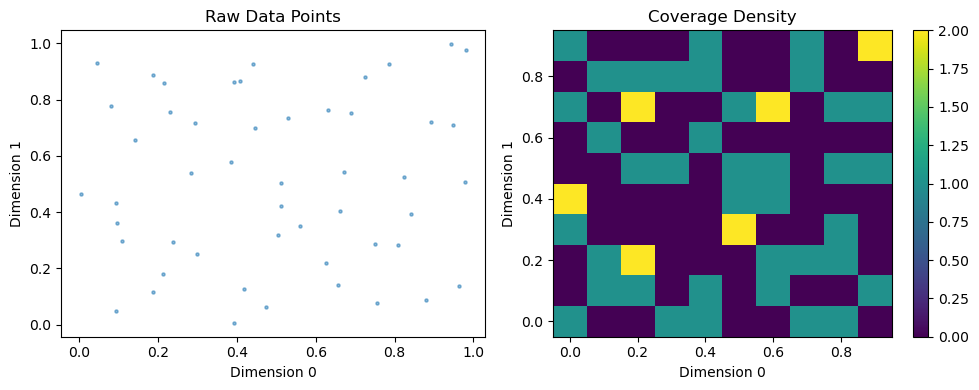

In [103]:
z_analyzer.compute_coverage_metrics(Z), z_analyzer.plot_2d_coverage(Z)

In [106]:
model = TechnologySubstitution()
solver = NumericalSolver(model)
sim = Simulator(g, model, solver)

In [107]:
control = 0.5

In [108]:
results = sim.simulate(control,delta_t=0.1, num_samples_per_cell=3, num_steps= 500, save_result=False)

Simulation complete:
- 75 samples × 500 timesteps = 37500 total rows
- State dimensions: 2
- Control dimensions: 1


In [109]:
initial_conditions = results.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions = initial_conditions[['x0', 'x1']].to_numpy()
all_data_points = results[['x0', 'x1']].to_numpy()

In [110]:
np.max(all_data_points[:,0])

np.float64(126.38504855840063)

In [111]:
Z0 = g.transform(initial_conditions)
Zall = g.transform(all_data_points)
Zall.shape, np.max(Z0[:,0]), np.max(Zall[:,0])

((37500, 2), np.float64(0.9668275397227415), np.float64(0.976813395106886))

({'occupied_bins': np.int64(56),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.56),
  'max_density': np.float64(3.0),
  'min_density': np.float64(1.0),
  'hull_volume': 0.8973731158754372,
  'effective_volume': np.float64(1.1027602559701948)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

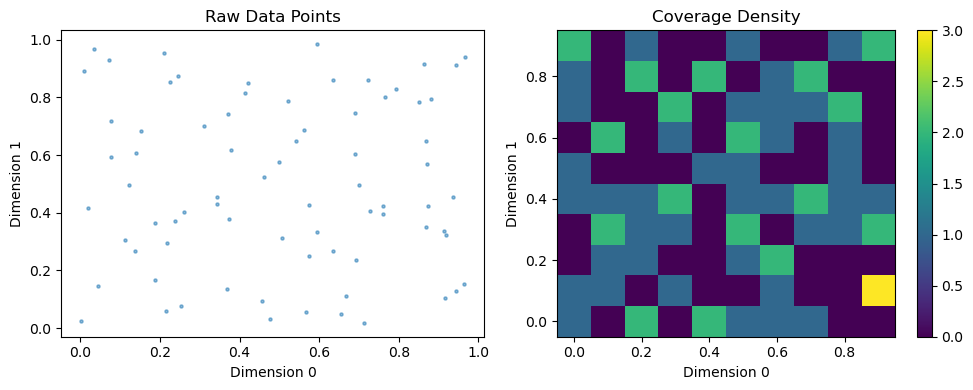

In [112]:
z_analyzer.compute_coverage_metrics(Z0), z_analyzer.plot_2d_coverage(Z0)

({'occupied_bins': np.int64(94),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(0.94),
  'max_density': np.float64(2508.0),
  'min_density': np.float64(4.0),
  'hull_volume': 0.930312347762135,
  'effective_volume': np.float64(0.632924679437457)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

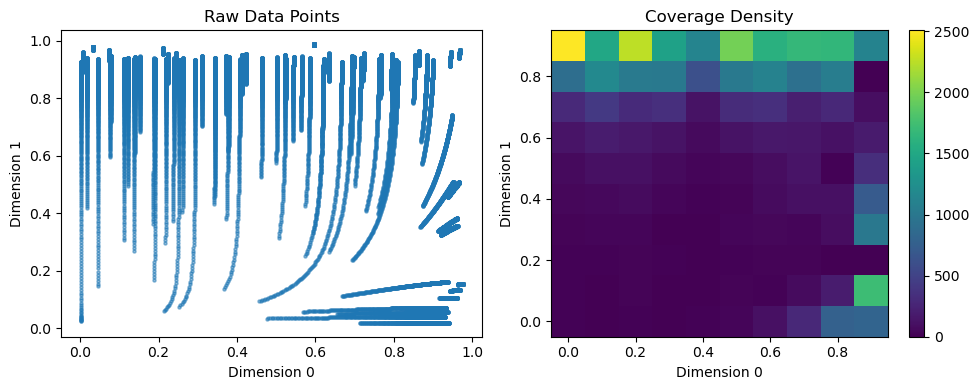

In [113]:
z_analyzer.compute_coverage_metrics(Zall), z_analyzer.plot_2d_coverage(Zall)

In [114]:
37500 , (10**2*19*19) # I want to sample almost the same amount of datapoints for comparison

(37500, 36100)

In [115]:
g2 = Grid([(0, np.inf), (0, np.inf)], [10, 10],[fractional_transformation(3), fractional_transformation(3)])
sim2 = Simulator(g2, model, solver)
results2 = sim2.simulate(control,delta_t=0.1, num_samples_per_cell=19, num_steps= 19, save_result=False)

Simulation complete:
- 1900 samples × 19 timesteps = 36100 total rows
- State dimensions: 2
- Control dimensions: 1


In [116]:
initial_conditions2 = results2.drop_duplicates(subset=['trajectory_id'], keep='first')
initial_conditions2 = initial_conditions2[['x0', 'x1']].to_numpy()
all_data_points2 = results2[['x0', 'x1']].to_numpy()
Z0_2 = g2.transform(initial_conditions2)
Zall_2 = g2.transform(all_data_points2)

({'occupied_bins': np.int64(100),
  'total_bins': np.int64(100),
  'coverage_ratio': np.float64(1.0),
  'max_density': np.float64(492.0),
  'min_density': np.float64(152.0),
  'hull_volume': 0.9921780877529599,
  'effective_volume': np.float64(1.1869367422115038)},
 (<Figure size 1000x400 with 3 Axes>,
  (<Axes: title={'center': 'Raw Data Points'}, xlabel='Dimension 0', ylabel='Dimension 1'>,
   <Axes: title={'center': 'Coverage Density'}, xlabel='Dimension 0', ylabel='Dimension 1'>)))

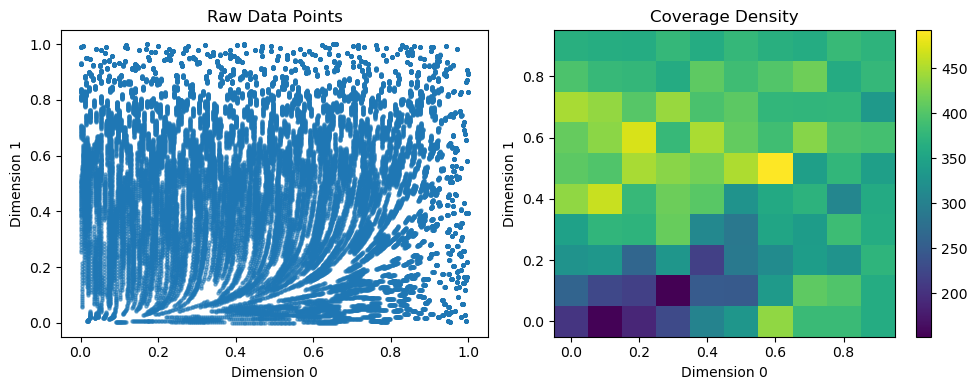

In [117]:
z_analyzer.compute_coverage_metrics(Zall_2), z_analyzer.plot_2d_coverage(Zall_2)